<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_11_Pandas Explode.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [34]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## 🟨 Bar Plot of Top Skills for Cloud Engineers (2.11.1)

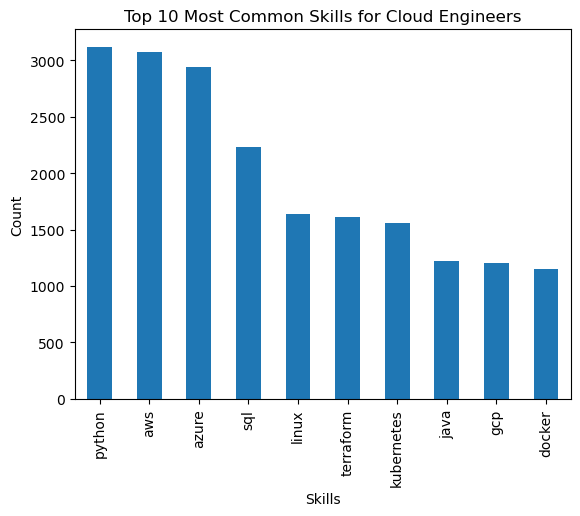

In [15]:
# Problem Statement:
# Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column.
# NOTE: For future problems, it'll be assumed that you have done this step in preparation for exploding this column.
# Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
# Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.
import ast
df_CE=df[df.job_title_short=='Cloud Engineer'].copy()
def method(skill):
    if skill is not None:
        return ast.literal_eval(skill)
    else:
        return skill
df_CE['job_skills']=df_CE.job_skills.apply(method)
de_CE_exploded=df_CE.explode('job_skills')
skill_count=de_CE_exploded.groupby('job_skills').size().sort_values(ascending=False).head(10)
skill_count.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.show()

---

## 🟨 Average Salary by Skill (2.11.2)

In [30]:
# Problem Statement:
# Explode the job_skills column in the DataFrame and calculate the average salary for each skill. 
# Display the top 5 skills with the highest average salary.

import ast
df_copy=df.copy()
def method(skill):
    if skill is not None:
        return ast.literal_eval(skill)
    else:
        return skill
df_copy['job_skills']=df_copy.job_skills.apply(method)
de_exploded=df_copy.explode('job_skills')
de_exploded.groupby('job_skills')['salary_year_avg'].mean().sort_values(ascending=False).head()

job_skills
debian         196500.000000
ringcentral    182500.000000
lua            170500.000000
mongo          169526.929749
dplyr          160667.210526
Name: salary_year_avg, dtype: float64

---

## 🟥 Unique Skills Count (2.11.3)

In [42]:
# Problem Statement:
# Calculate the number of unique skills required for each job_title_short.

# Explode the job_skills column

# Group by job_title_short

# Count unique skills per title (i.e., num_unique_skills)

# Rename the result column to num_unique_skills and show the first 5 rows
df_copy=df.copy()
df_copy['job_skills']=df_copy.job_skills.apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_copy=df_copy.explode('job_skills')
df_copy.groupby('job_title_short')['job_skills'].nunique().reset_index().head()

,job_title_short,job_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237


---